# Heroin

Heroin was asked about in a straight forward way from questions of if ever used it, to when was the last time used and what was their age when they used it.

In [1]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [2]:
#data is a tsv file therefore read it as a csv file with \t as the seperator
dataset = pd.read_csv('data/drugs-dataset.tsv', delimiter = '\t')

In [3]:
case_quest_data = dataset.ix[:,0:2].copy()
heroin = dataset.ix[:,'HEREVER':'HR30EST'].copy() # heroin dataset

In [4]:
# This function splits our data frame in predifined age groups
def cutDF(df):
    return pd.cut(
        df,[0, 10, 20, 30, 40, 50, 60, 70, 80], 
        labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

* How many cases use the drug?

Unlike other drugs, Heroin is not very popular. From the whole case study, only 825 cases tried or used Heroin. 

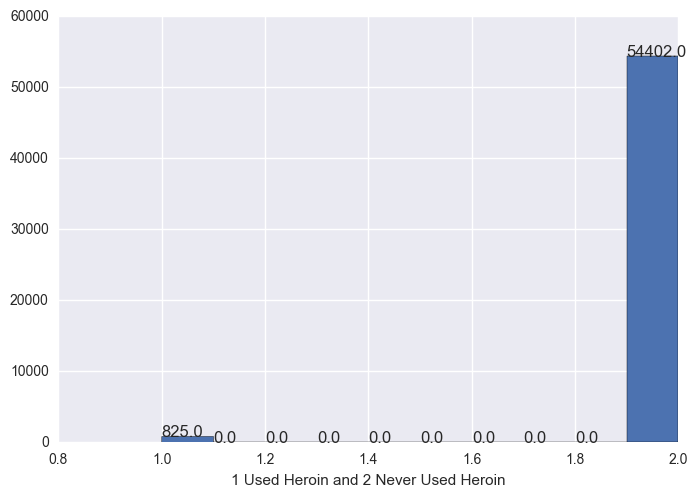

In [7]:
# extract how many ever used the drug
heroin_ever = heroin.ix[(heroin['HEREVER'] < 3)].copy()
ax = heroin_ever['HEREVER'].hist()
plt.xlabel('1 Used Heroin and 2 Never Used Heroin')

for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

* What are their age range?

From those who used Heroin, it seems that teenagers and young adults aging from 10 to 30 are the most who tried or used it.

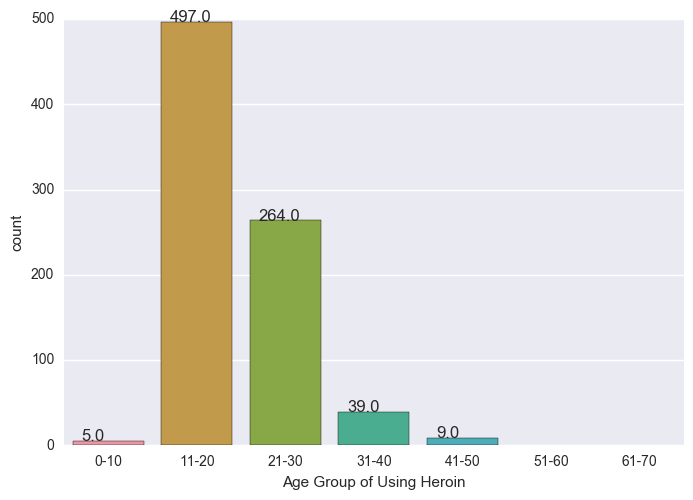

In [12]:
# extract the age range of those who ever used the drug
age_data = heroin_ever.ix[(heroin_ever['HERAGE'] < 90)].copy()
age_data['AgeGroup'] = age_data[['HERAGE']].apply(cutDF)
ax = sns.countplot(x=age_data['AgeGroup'], order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70'])
plt.xlabel('Age Group of Using Heroin')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()))

* How frequently they use it?

The majority of the cases used Heroin for 20 days or less for the last 30 days before the conduction of the survey. Only teenagers and early young adults (14-22 years old) used Heroin everyday for the last 30 days. However, mid-adults, ages 35 or older, seem to have used Heroin for more than 20 days.

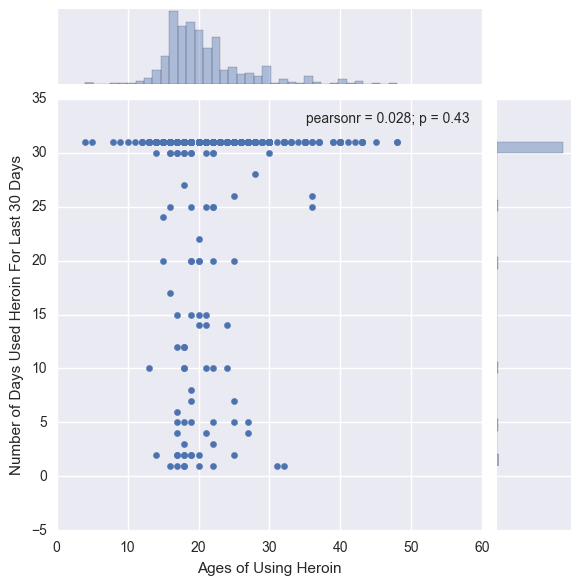

In [9]:
# number of days used the drug for the last 30 days
estHowMany = age_data.ix[(age_data['HER30USE'] < 31) | (age_data['HER30USE'] == 93)].copy()
estHowMany['HER30USE'] = estHowMany.ix[:,'HER30USE'].replace(to_replace=93, value=31)
sns.jointplot(x=estHowMany['HERAGE'],y=estHowMany['HER30USE']).set_axis_labels("Ages of Using Heroin", "Number of Days Used Heroin For Last 30 Days");

* Did they stop and go back to it? Are they planning to quit?

Very small amount of cases still use Heroin or used it winthin the past 30 days. However, almost all the cases who ever tried or used Heroin did not use it for more than 12 months.

1 = Within the past 30 days <br/>
2 = More than 30 days ago but within the past 12 mos <br/>
3 = More than 12 months ago <br/>

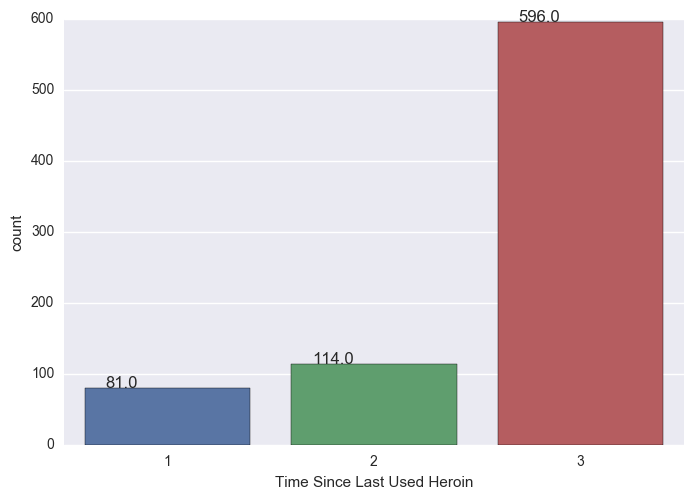

In [11]:
lastUsed = age_data.ix[(age_data['HERREC'] < 5)].copy()
ax = sns.countplot(lastUsed['HERREC'])
plt.xlabel('Time Since Last Used Heroin')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()))

## Next

[Hallucinogens](Hallucinogens.ipynb)